# DL Assignment 13
## Sargun Singh (102115078) 4O1D

**Q1** *Write a program to Generate MNIST Digits using GANs.*

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, LeakyReLU
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [13]:
# Load MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

# Normalize the data and keep the shape as (28, 28)
x_train = x_train.astype('float32') / 255.0

In [14]:
# Define the dimensions of the noise vector
latent_dim = 100

In [15]:
# Generator Model
def build_generator():
    model = Sequential([
        Dense(256, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dense(1024),
        LeakyReLU(alpha=0.2),
        Dense(28 * 28, activation='sigmoid'),  # Output matches MNIST image shape
        Reshape((28, 28))
    ])
    return model

In [24]:
# Discriminator Model
def build_discriminator():
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten only here
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')  # Output: probability of being real
    ])
    return model

In [25]:
# Build GAN Model
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator in GAN training
    model = Sequential([generator, discriminator])
    return model

In [26]:
# Create generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

In [27]:
# Compile discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Build and compile GAN
gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')

In [36]:
def train_gan(generator, discriminator, gan, epochs=10000, batch_size=64, sample_interval=1000):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train discriminator with real images
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        real_images = x_train[idx]
        real_labels = np.ones((half_batch, 1))  # Label real images as 1

        # Train discriminator with fake images
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_images = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1))  # Label fake images as 0

        # Update discriminator
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator via GAN
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))  # Try to fool discriminator into thinking generated images are real
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Display progress
        if epoch % sample_interval == 0:
            try:
                print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100 * d_loss[1]:.2f}] [G loss: {g_loss:.4f}]")
            except (TypeError, IndexError) as e:
                print(f"Error formatting output: {e}, d_loss: {d_loss}, g_loss: {g_loss}")
            sample_images(generator, epoch)


In [38]:
# Function to sample and save generated images
def sample_images(generator, epoch, grid_size=(5, 5)):
    noise = np.random.normal(0, 1, (grid_size[0] * grid_size[1], latent_dim))
    generated_images = generator.predict(noise)

    # Rescale images to [0, 1] for display
    generated_images = 0.5 * generated_images + 0.5

    fig, axs = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 10))
    count = 0
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            axs[i, j].imshow(generated_images[count, :, :], cmap='gray')
            axs[i, j].axis('off')
            count += 1
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Error formatting output: unsupported format string passed to list.__format__, d_loss: [0.7343898 0.3828125], g_loss: [array(0.7886578, dtype=float32), array(0.7886578, dtype=float32), array(0.328125, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


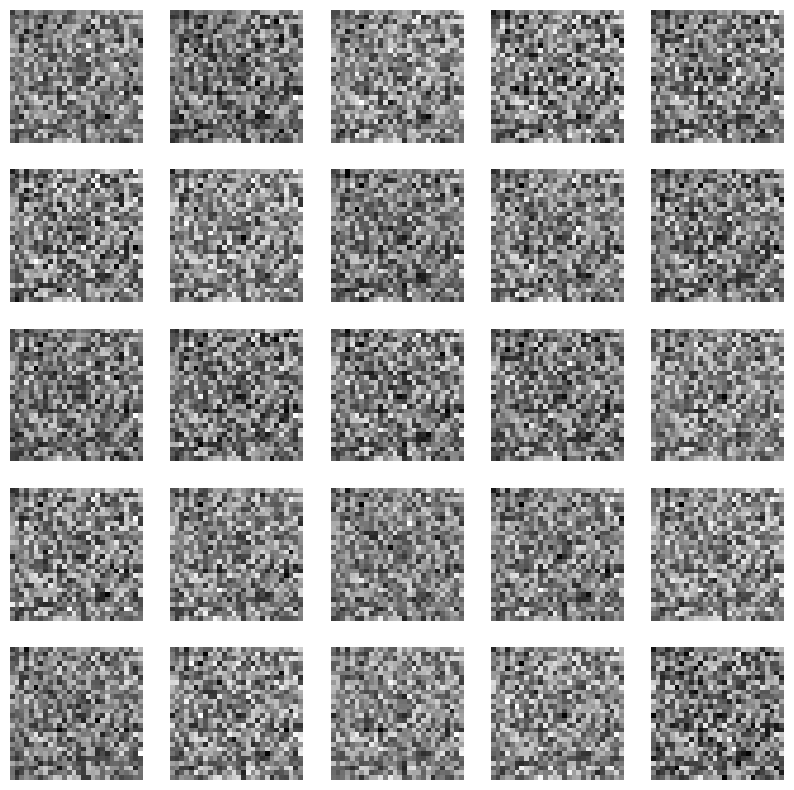

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

In [ ]:
# Train the GAN
train_gan(generator, discriminator, gan, epochs=10000, batch_size=64, sample_interval=1000)